In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [27]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
#conver data type to float32
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)
# x_train = x_train.astype('float32')
y_train, y_test = tf.cast(y_train,tf.int64 ),tf.cast(y_test, tf.int64)

print(x_train.shape)

# for i in range(10):
#   plt.imshow(x_train[i], cmap='gray')
#   print(y_train[i])
#   plt.show()
num_classes = 10
#num_features = 28*28 =784
num_features = x_train.shape[1]*x_train.shape[2]
print(num_features)

# Flatten images to 1-D vector of 784 features (28*28)
x_train , x_test = tf.reshape(x_train, [-1, num_features]) , tf.reshape(x_test, [-1, num_features])
# Normalize images value from [0, 255] to [0,1]
x_train , x_test = x_train/255 , x_test/255

(60000, 28, 28)
784


In [28]:
from tensorflow.keras import Model, layers 

class NeuralNet(Model):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.fc1 = layers.Dense(128, activation=tf.nn.relu)
    self.fc2 = layers.Dense(256, activation=tf.nn.relu)
    self.out = layers.Dense(num_classes)

  def call(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.out(x)
    return x 

mlp = NeuralNet()

In [29]:
def cross_entropy_loss(x,y):
  loss =tf.nn.sparse_softmax_cross_entropy_with_logits(logits=x , labels=y)
  return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [30]:
lr = 0.003
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x,y):
  with tf.GradientTape() as g:
    pred = mlp(x)
    loss = cross_entropy_loss(pred,y)

  trainable_variables = mlp.trainable_variables
  gradients = g.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))


In [31]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 50
display_epoch = 2

for epo in range(1, epoch+1):
  for step, (batch_x, batch_y) in enumerate(train_data, 1):
    run_optimization(batch_x, batch_y)

  if epo % display_epoch == 0:
    pred = mlp(batch_x)
    loss = cross_entropy_loss(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("epoch: ", epo, ", loss: ", loss.numpy(), ", acc: ", acc.numpy())

epoch:  2 , loss:  1.5195976 , acc:  0.675
epoch:  4 , loss:  0.7965643 , acc:  0.785
epoch:  6 , loss:  0.6290409 , acc:  0.815
epoch:  8 , loss:  0.5514542 , acc:  0.855
epoch:  10 , loss:  0.38754869 , acc:  0.895
epoch:  12 , loss:  0.3823639 , acc:  0.89
epoch:  14 , loss:  0.42278832 , acc:  0.895
epoch:  16 , loss:  0.3665025 , acc:  0.895
epoch:  18 , loss:  0.29107288 , acc:  0.9
epoch:  20 , loss:  0.24193023 , acc:  0.94
epoch:  22 , loss:  0.38297004 , acc:  0.9
epoch:  24 , loss:  0.37737808 , acc:  0.885
epoch:  26 , loss:  0.31127453 , acc:  0.925
epoch:  28 , loss:  0.28469747 , acc:  0.925
epoch:  30 , loss:  0.2241109 , acc:  0.925
epoch:  32 , loss:  0.24344778 , acc:  0.93
epoch:  34 , loss:  0.23047917 , acc:  0.91
epoch:  36 , loss:  0.2548714 , acc:  0.92
epoch:  38 , loss:  0.24807213 , acc:  0.915
epoch:  40 , loss:  0.20051794 , acc:  0.935
epoch:  42 , loss:  0.31298012 , acc:  0.92
epoch:  44 , loss:  0.35682866 , acc:  0.91
epoch:  46 , loss:  0.192667 , ac

In [32]:
pred = mlp(x_test)
print("Test Accuracy: ", accuracy(pred, y_test).numpy())

Test Accuracy:  0.9323


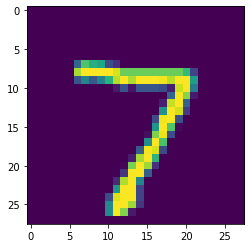

Model prediction: 7


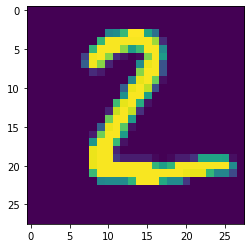

Model prediction: 2


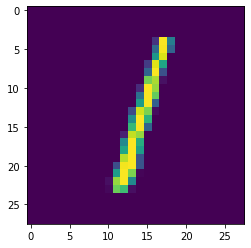

Model prediction: 1


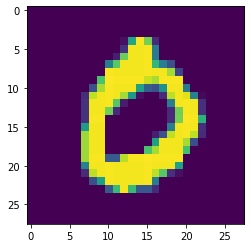

Model prediction: 0


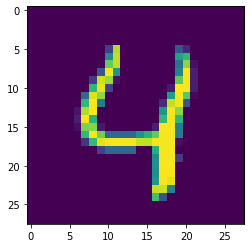

Model prediction: 4


In [36]:
test_image = x_test[:5]
prediction = mlp(test_image)

for i in range(5):
  plt.imshow(np.reshape(test_image[i],[28,28]))
  plt.show()
  print("Model prediction: %i" % np.argmax(prediction.numpy()[i]))